# Transfer Learning

In [2]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
% matplotlib inline
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [ ]:
def fashion_mnist_preprocess():
    
    num_classes = 10
    
    # get data
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train.shape, y_train.shape, x_test.shape, y_test.shape
    
    # input image dimensions
    img_rows, img_cols = 28, 28
    
    # reshape to channel_last format
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
    # normalize data
    x_train_normalize = x_train / 255
    x_test_normalize = x_test / 255
    
    # convert class vectors to binary class matrices
    y_train_class = keras.utils.to_categorical(y_train, num_classes)
    y_test_class = keras.utils.to_categorical(y_test, num_classes)
    
    return (x_train_normalize, y_train_class), (x_test_normalize, y_test_class)

In [ ]:
(x_train_conv, y_train_class), (x_test_conv, y_test_class) = fashion_mnist_preprocess()

## Basic CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation='softmax'))

In [6]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 128)         0         
__________

In [ ]:
cnn.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [8]:
%time
history = cnn.fit(x_train_conv, y_train_class, batch_size=128, epochs=5, verbose=1, validation_split = 0.2)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.25 µs
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 8s 166us/step - loss: 0.6918 - acc: 0.7414 - val_loss: 0.4325 - val_acc: 0.8382
Epoch 2/5
48000/48000 [==============================] - 6s 129us/step - loss: 0.4356 - acc: 0.8399 - val_loss: 0.3637 - val_acc: 0.8680
Epoch 3/5
46976/48000 [============================>.] - ETA: 0s - loss: 0.3690 - acc: 0.864448000/48000 [==============================] - 6s 128us/step - loss: 0.3682 - acc: 0.8646 - val_loss: 0.3168 - val_acc: 0.8820
Epoch 4/5
48000/48000 [==============================] - 6s 128us/step - loss: 0.3393 - acc: 0.8762 - val_loss: 0.3003 - val_acc: 0.8920
Epoch 5/5
48000/48000 [==============================] - 6s 129us/step - loss: 0.3150 - acc: 0.8822 - val_loss: 0.2942 - val_acc: 0.8894


In [ ]:
def plot_metrics(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize =(16,6))
    plt.subplot(121)
    epochs = range(1, len(loss)+1)
    plt.plot(epochs, loss, 'b', label="Training Loss" )
    plt.plot(epochs, val_loss, 'r', label="Validation Loss" )
    plt.legend()
    
    plt.subplot(122)
    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, 'b', label="Training Accuracy" )
    plt.plot(epochs, val_acc, 'r', label="Validation Accuracy" )
    plt.legend()
    
    plt.show()

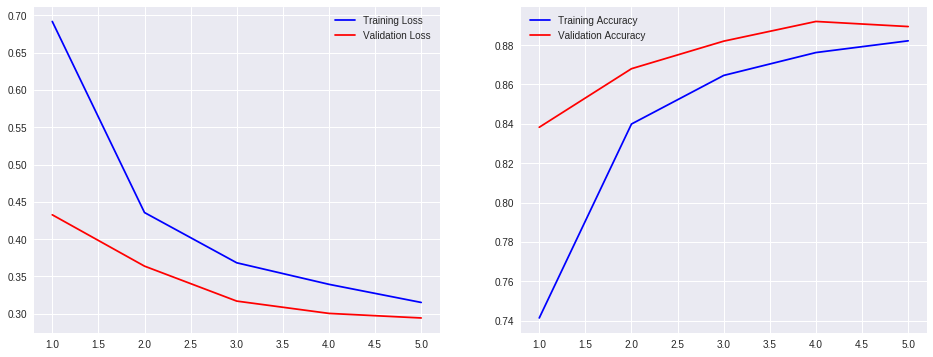

In [10]:
plot_metrics(history)

In [11]:
score = cnn.evaluate(x_test_conv, y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3053879317998886
Test accuracy: 0.887


## Data Augementation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_conv, y_train_class, test_size=0.2, random_state=12345)

In [ ]:
# this will do preprocessing and realtime data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [ ]:
datagen.fit(x_train)

In [17]:
# fits the model on batches with real-time data augmentation:
history = cnn.fit_generator(datagen.flow(x_train_conv, y_train_class, batch_size=32), 
                             validation_data=(x_val, y_val), use_multiprocessing=True,
                     steps_per_epoch=len(x_train_conv) / 32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4906 - acc: 0.8152 - val_loss: 0.3226 - val_acc: 0.8786
Epoch 2/5
 923/1875 [=============>................] - ETA: 14s - loss: 0.4544 - acc: 0.82991875/1875 [==============================] - 29s 16ms/step - loss: 0.4515 - acc: 0.8298 - val_loss: 0.3272 - val_acc: 0.8749
Epoch 3/5
1391/1875 [=====================>........] - ETA: 7s - loss: 0.4309 - acc: 0.83781875/1875 [==============================] - 30s 16ms/step - loss: 0.4283 - acc: 0.8394 - val_loss: 0.3166 - val_acc: 0.8801
Epoch 4/5
1550/1875 [=======================>......] - ETA: 4s - loss: 0.4143 - acc: 0.84411875/1875 [==============================] - 30s 16ms/step - loss: 0.4134 - acc: 0.8447 - val_loss: 0.2875 - val_acc: 0.8928
Epoch 5/5
1604/1875 [========================>.....] - ETA: 4s - loss: 0.4029 - acc: 0.85021875/1875 [==============================] - 30s 16ms/step - loss: 0.4024 - acc: 0.8499 - val_loss: 0.3203 - val_acc: 0.8798


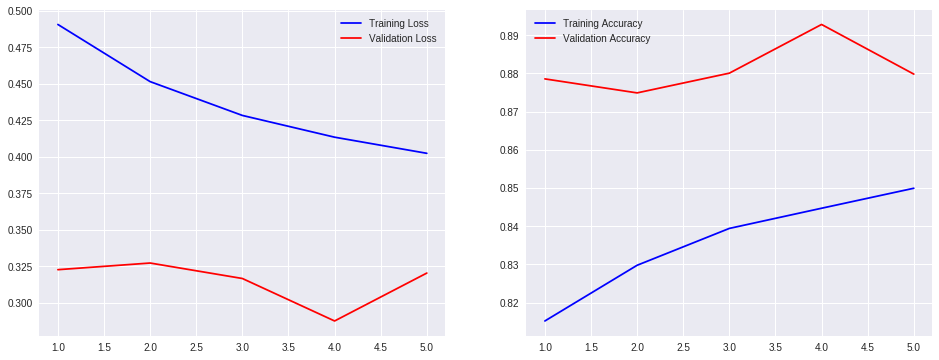

In [18]:
plot_metrics(history)

In [19]:
score = cnn.evaluate(x_test_conv, y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3679312683582306
Test accuracy: 0.8657


## Transfer Learning

Lets resize the image from (28,28,1) to (48,48,3)

In [ ]:
from skimage.transform import resize

In [ ]:
def resize_image(image):
    return resize(image, (96,96,3), mode="symmetric")

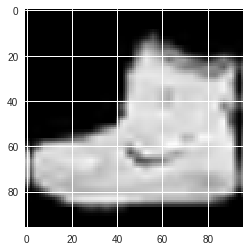

In [14]:
plt.imshow(resize_image(x_train_conv[0]))

Lets resize the 10000 images in train and test data

In [21]:
%timeit
x_train_conv_resize = np.array([resize_image(x_train_conv[x]) for x in range(x_train_conv[:10000].shape[0])])
x_train_conv_resize.shape

(10000, 96, 96, 3)

In [22]:
%timeit
x_test_conv_resize = np.array([resize_image(x_test_conv[x]) for x in range(x_test_conv.shape[0])])
x_test_conv_resize.shape

(10000, 96, 96, 3)

Let us load the VGG model without the classifier layer and **do not** train the weights

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(include_top=False, weights='imagenet', 
                        input_tensor=None, input_shape=(96,96,3), pooling="avg")

In [ ]:
conv_base.trainable = False

In [26]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0         
__________

Lets build a Dense Layer Classifier after that to classify the fashion mnist data

In [ ]:
model_transfer = Sequential()
model_transfer.add(conv_base)
model_transfer.add(Dense(128, activation='relu'))
model_transfer.add(Dropout(0.25))
model_transfer.add(Dense(64, activation='relu'))
model_transfer.add(Dense(10, activation='softmax'))

In [30]:
model_transfer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 14,789,258
Trainable params: 74,570
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model_transfer.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [32]:
%time
history_transfer = model_transfer.fit(x_train_conv_resize, y_train_class[:10000], 
                                      batch_size=128, epochs=5, verbose=1, validation_split = 0.2)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.72 µs
Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 25s 3ms/step - loss: 1.5235 - acc: 0.4991 - val_loss: 0.8402 - val_acc: 0.7250
Epoch 2/5
8000/8000 [==============================] - 20s 2ms/step - loss: 0.7511 - acc: 0.7385 - val_loss: 0.6014 - val_acc: 0.7865
Epoch 3/5
8000/8000 [==============================] - 20s 2ms/step - loss: 0.5992 - acc: 0.7849 - val_loss: 0.5358 - val_acc: 0.8105
Epoch 4/5
7296/8000 [==========================>...] - ETA: 1s - loss: 0.5267 - acc: 0.81108000/8000 [==============================] - 20s 2ms/step - loss: 0.5247 - acc: 0.8120 - val_loss: 0.5153 - val_acc: 0.8120
Epoch 5/5
8000/8000 [==============================] - 20s 2ms/step - loss: 0.4883 - acc: 0.8236 - val_loss: 0.4757 - val_acc: 0.8300


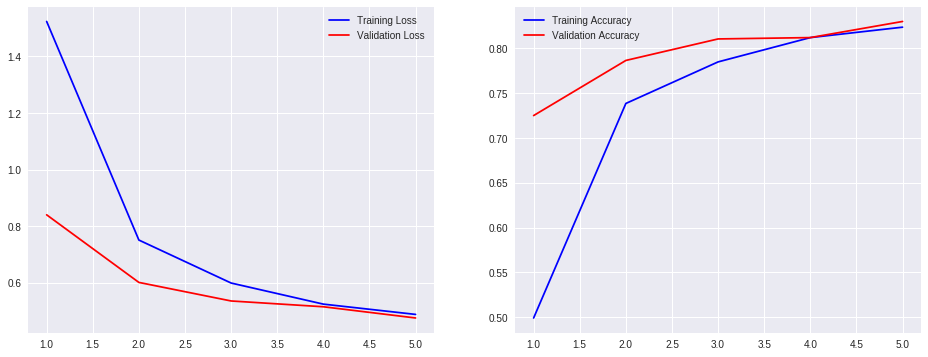

In [35]:
plot_metrics(history_transfer)

In [40]:
score = model_transfer.evaluate(x_test_conv_resize, y_test_class, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 24s 2ms/step
Test loss: 0.4677408727169037
Test accuracy: 0.8301
